In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import torch

In [4]:
def generate_shift_one_dim_dataset(n, p, q, seed):
    rng = np.random.RandomState(seed)
    
    us1 = rng.binomial(n=1, p=p, size=int(n * q))
    xs1 = rng.uniform(0.0, 10.0, size=int(n * q))
    noise1 = rng.normal(0.0, 50.0, size=int(n * q))
    ys1 = xs1 * xs1 * xs1 + 1 * xs1 * xs1 * xs1 * us1 + noise1
    
    us2 = rng.binomial(n=1, p=p, size=int(n * (1 - q)))
    xs2 = rng.uniform(0.0, 1.0, size=int(n * (1 - q)))
    noise2 = rng.normal(0.0, 50.0, size=int(n * (1 - q)))
    ys2 = xs2 * xs2 * xs2 + 1 * xs2 * xs2 * xs2 * us2 + noise2
    
    xs = np.concatenate((xs1, xs2))
    ys = np.concatenate((ys1, ys2))
    return xs.reshape(-1, 1), ys.reshape(-1, 1)

In [5]:
p_tests = [0.5, 0.9]
q_tests = [1, 0.5, 0.1]

data = []
for j in range(len(q_tests)):
    for i in range(len(p_tests)):
        x, y= generate_shift_one_dim_dataset(n=2000, p=p_tests[i], q=q_tests[j], seed=0)
        data.append((x, y))

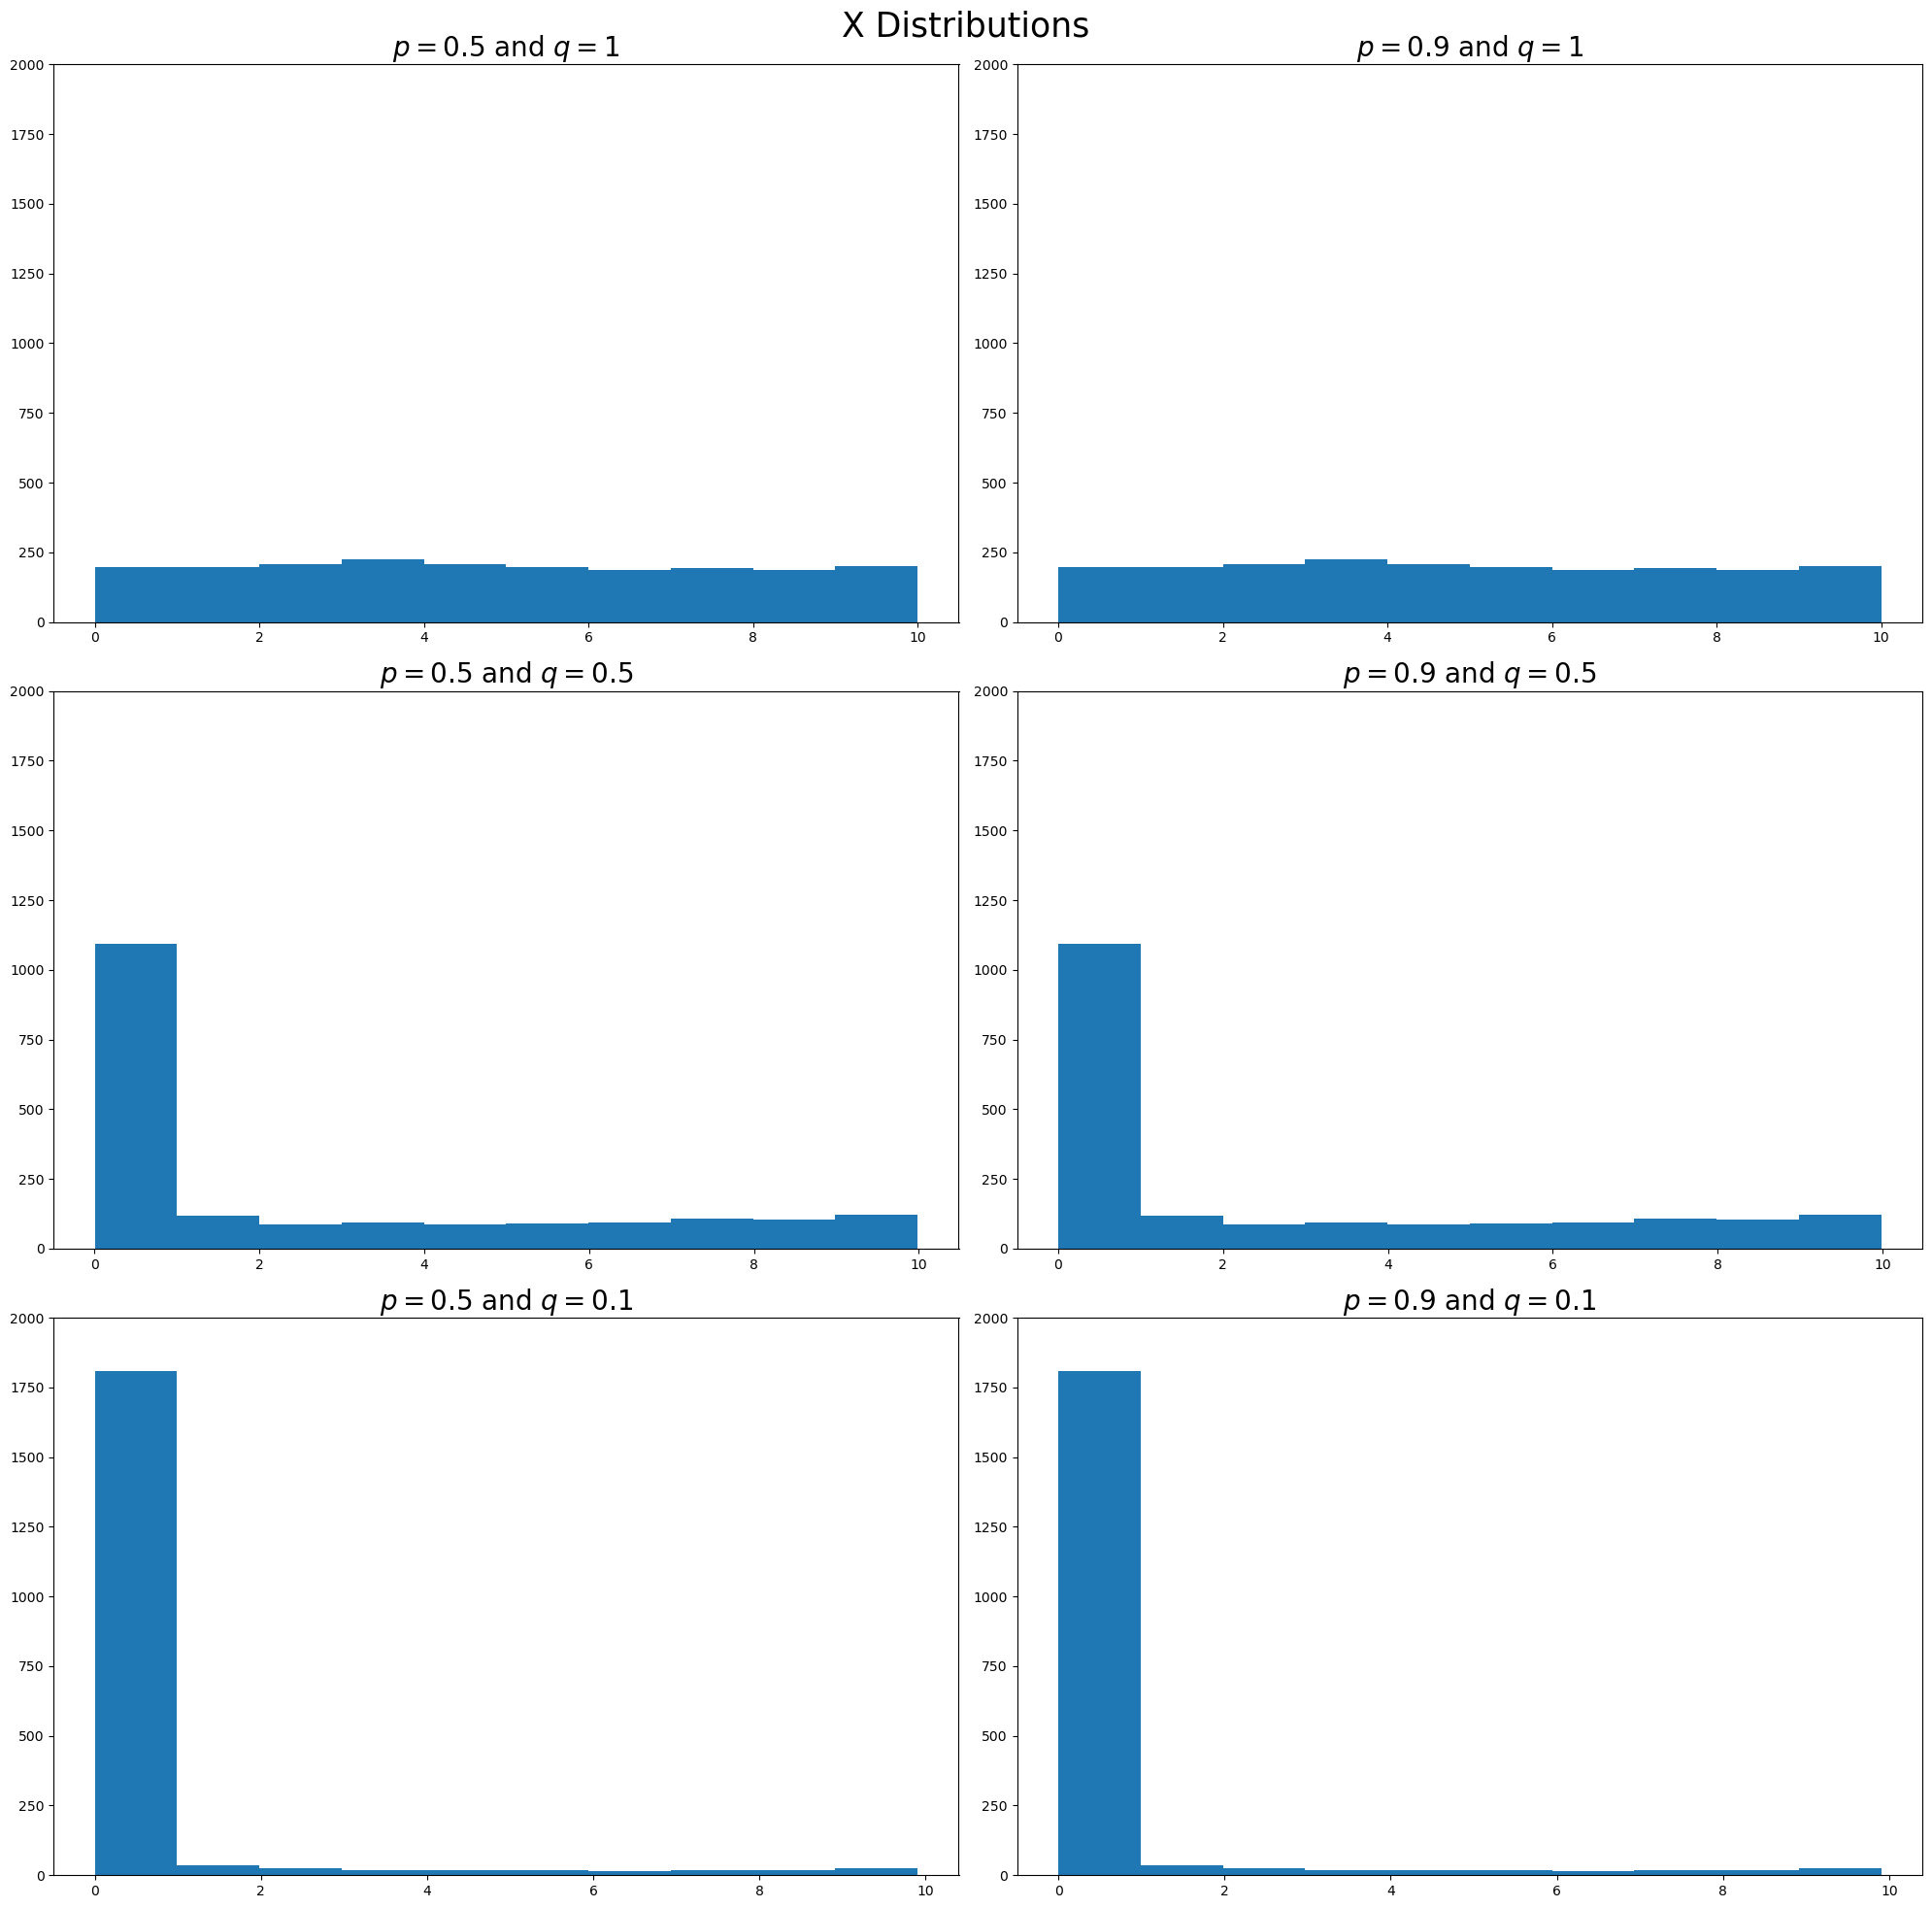

In [8]:
fig, ax = plt.subplots(3, 2, figsize=(20, 20))
ax = ax.flatten()
for i in range(len(data)):
    ax[i].set_title(r"$p={}$".format(round(p_tests[i % 2], 3)) + " and " + r"$q={}$".format(round(q_tests[int(i / 2)], 3)), fontsize=20)
    ax[i].hist(data[i][0])
    ax[i].set_ylim(0, 2000)
plt.suptitle("X Distributions", fontsize=25)
plt.savefig("x_distributions.png")
plt.tight_layout()

[[134.79225676]]
[[173.05269122]]
[[108.82924615]]
[[139.4271231]]
[[97.80227537]]
[[122.3378025]]


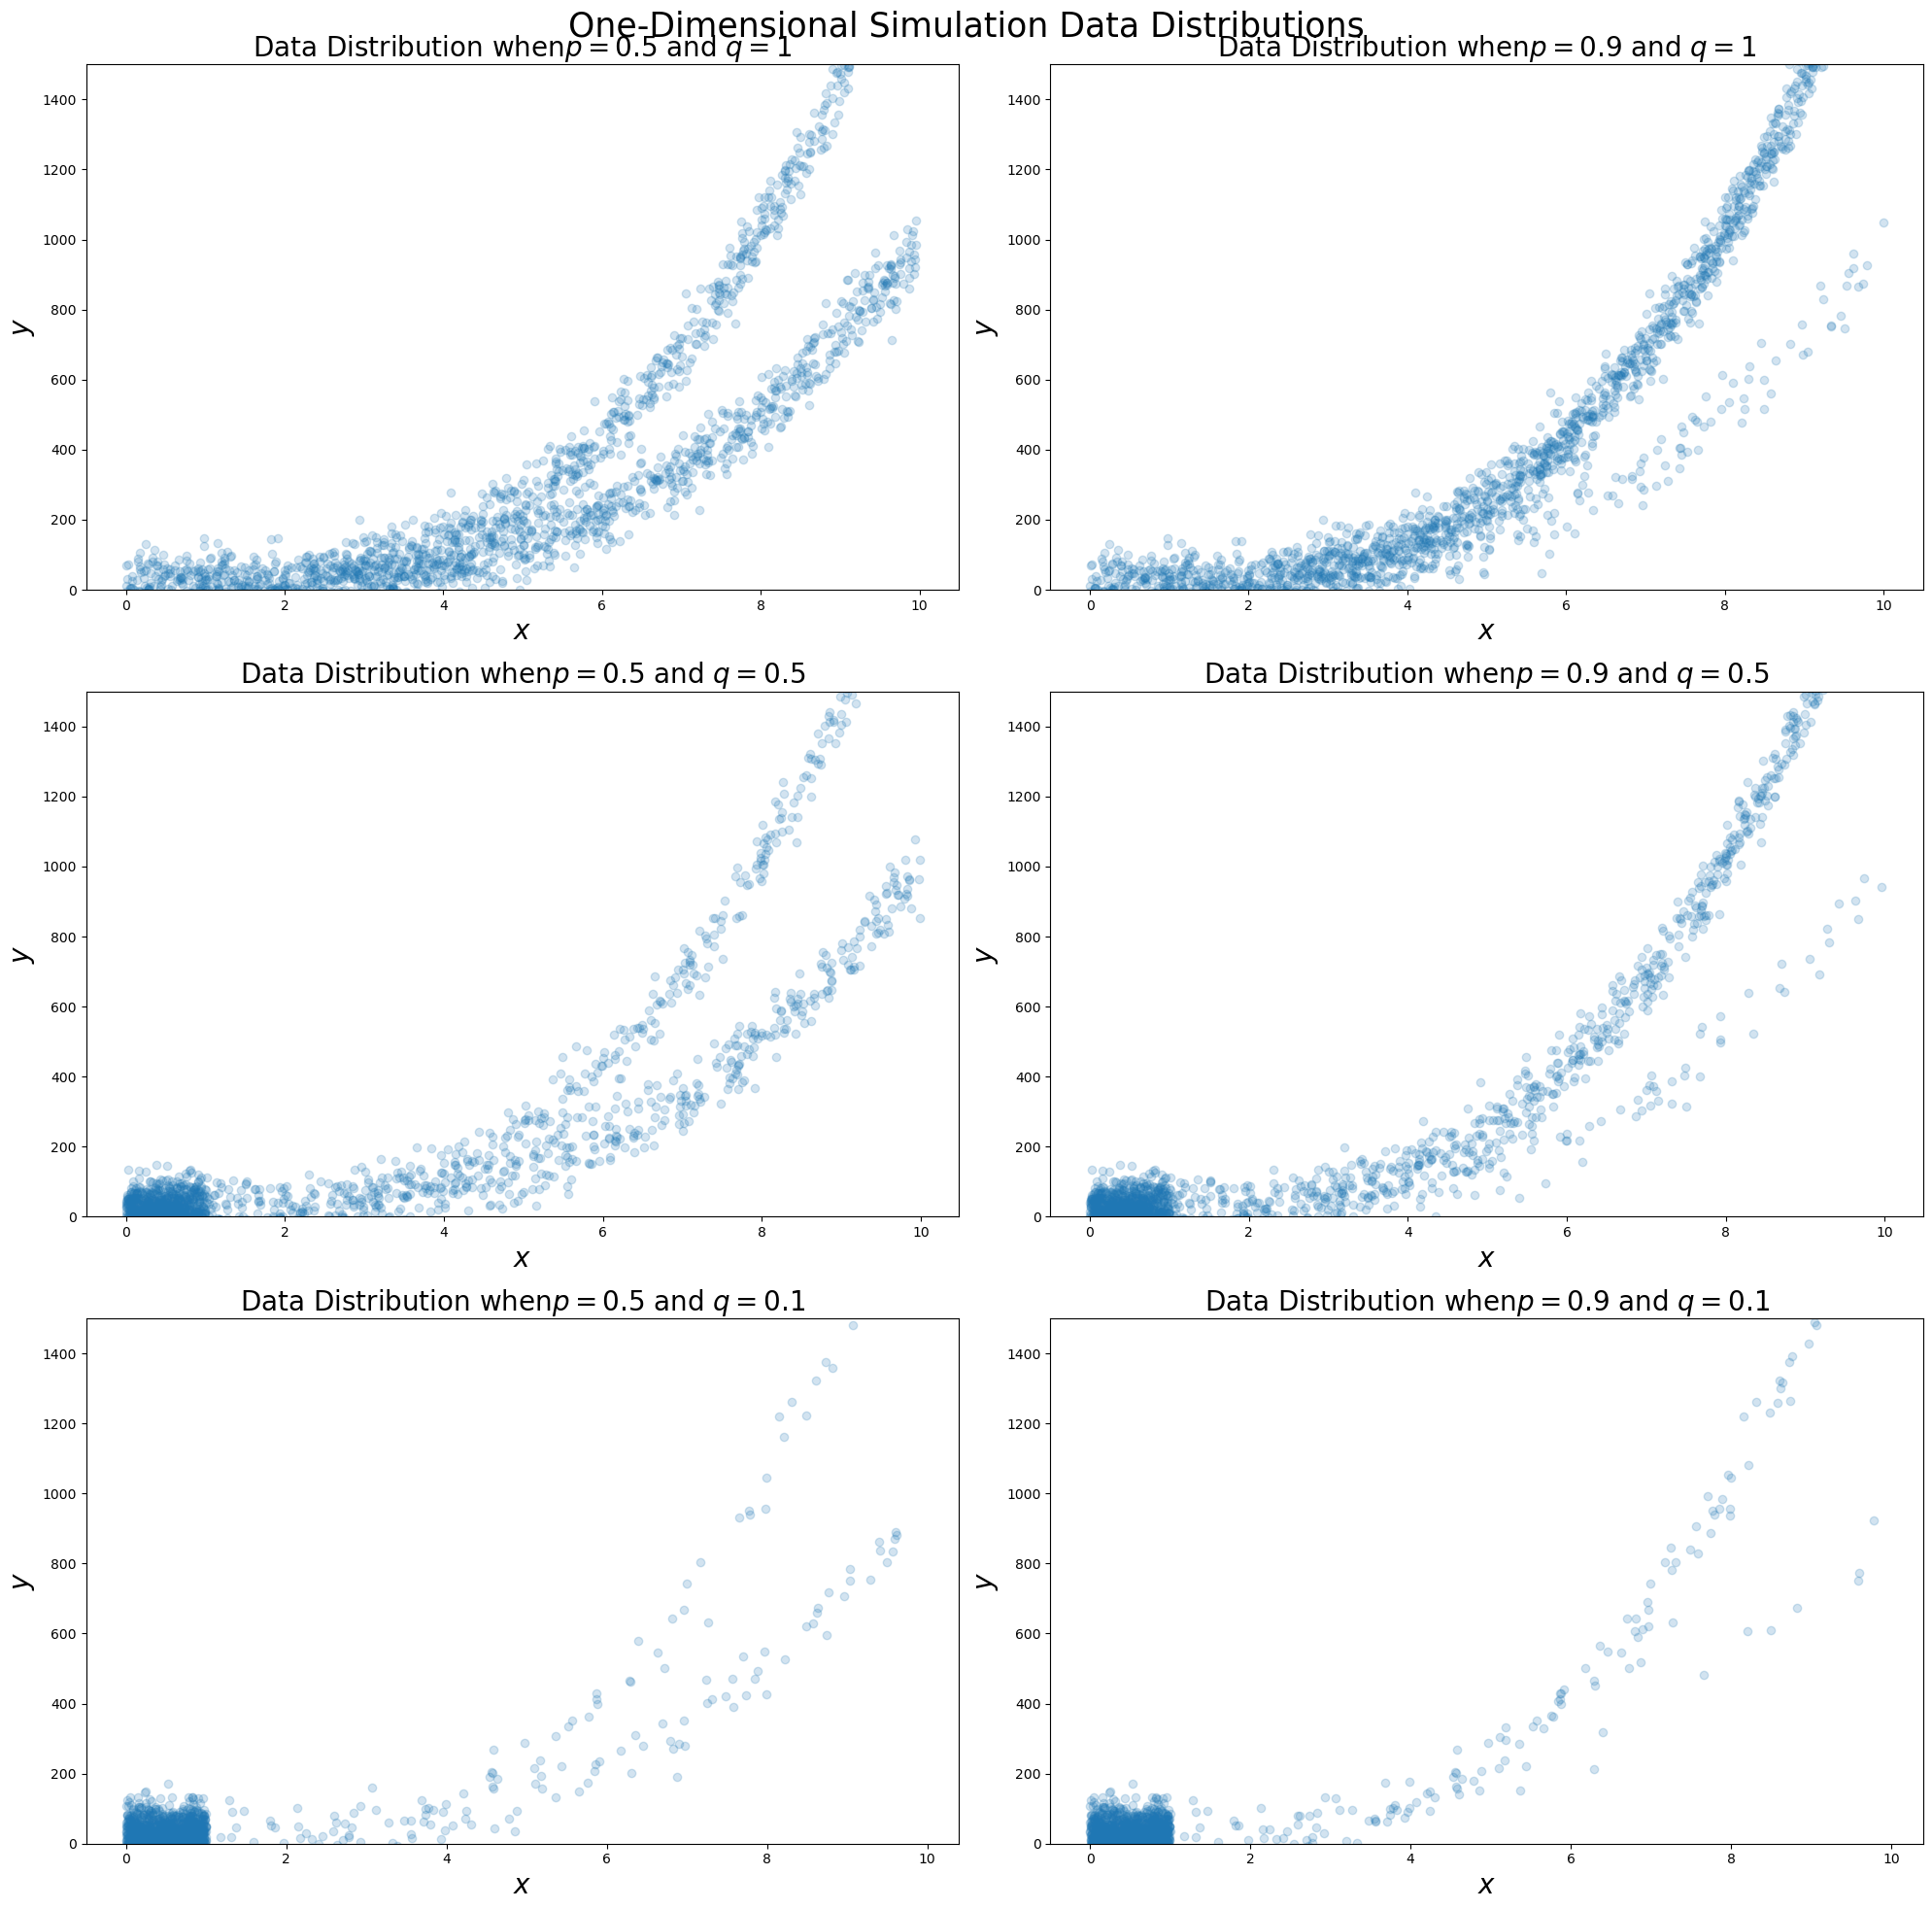

In [22]:
fig2, ax2 = plt.subplots(3, 2, figsize=(20, 20))
ax2 = ax2.flatten();
for i in range(len(data)):
    ax2[i].scatter(data[i][0], data[i][1], alpha=0.2)
    ax2[i].set_title("Data Distribution when " + r"$p={}$".format(round(p_tests[i % 2], 3)) + " and " + r"$q={}$".format(round(q_tests[int(i / 2)], 3)), fontsize=20)
    ax2[i].set_xlabel(r"$x$", fontsize=20)
    ax2[i].set_ylabel(r"$y$", fontsize=20)
    ax2[i].set_ylim(0, 1500)
    model = LinearRegression()
    model.fit(data[i][0], data[i][1])
    print(model.coef_)
    y_pred = model.predict(data[i][0])
    mse = mean_squared_error(data[i][1], y_pred)
#     ax2[i].plot(data[i][0], y_pred, color='red', label='Linear Regression')
plt.suptitle("One-Dimensional Simulation Data Distributions", fontsize=25)
plt.savefig("data_distributions.png")
plt.tight_layout()